In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker

## Plotting preferences

In [2]:
# Font sizes
big_font = 25
medium_font = 20
small_font = 15

In [3]:
# Colours
my_colours = sns.color_palette("husl", 8)
my_colours

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

## Making bins 

In [4]:
num_Mbins = 15 
num_Pbins = 20 

Mbins = np.logspace(np.log10(0.3), np.log10(13), num_Mbins) 
Pbins = np.logspace(-2, 1, num_Pbins) 

## Making fake data 

In [5]:
# The number of data points
N = 100000

# Fake planet mass data 
log_mass = np.random.uniform(np.log10(.3), np.log10(13), N)
mass_data = 10** log_mass

# Fake period data 
log_period = np.random.uniform(np.log10(.01), np.log10(10), N) 
period_data = 10** log_period

# Fake detection data - random values either 0 or 1 
detection = np.random.randint(0, 2, N)
# detection = np.ones(N, dtype=int)

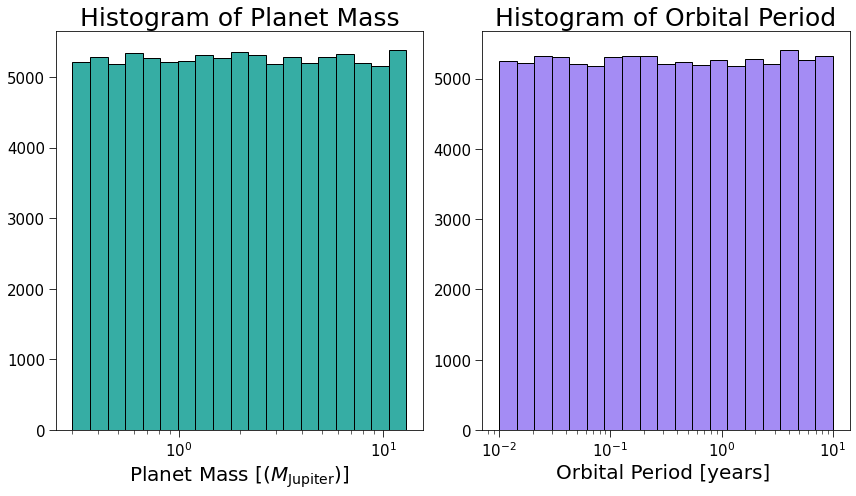

In [6]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(12,7))

# Plot histogram for m_planet
axs[0].hist(10**log_mass, # [M_J]
            bins=np.logspace(np.log10(0.3),np.log10(13), 20), 
            color=my_colours[-4], 
            edgecolor='black')

# Plot histogram for P
axs[1].hist(10**log_period, # [years]
            bins=np.logspace(-2, 1,20), 
            color=my_colours[-2], 
            edgecolor='black')


# Plot titles
axs[0].set_title('Histogram of Planet Mass', fontsize=big_font)
axs[1].set_title('Histogram of Orbital Period', fontsize=big_font)

# Axes scale 
axs[0].set_xscale('log')
axs[1].set_xscale('log')

# Axes labels 
axs[0].set_xlabel('Planet Mass [($M_{\mathrm{Jupiter}}$)]', fontsize=medium_font)
axs[1].set_xlabel('Orbital Period [years] ', fontsize=medium_font)

for i in range(2):
    axs[i].tick_params(labelsize=small_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

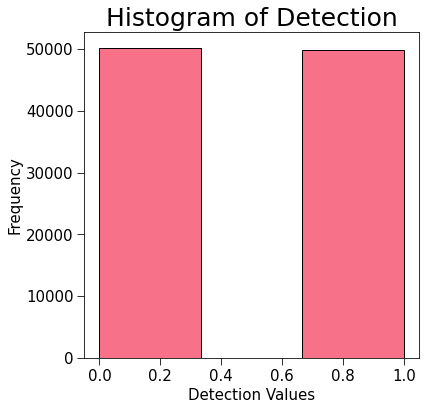

In [7]:
# Create a figure for the histogram
fig, ax = plt.subplots(figsize=(6, 6))  

# Plot histogram for detection data
ax.hist(detection, 
        bins=3, 
        color=my_colours[0], 
        edgecolor='black')  # Adjust the number of bins as needed

# Titles and axes
ax.set_title('Histogram of Detection', fontsize=big_font)
ax.set_xlabel('Detection Values', fontsize=small_font)
ax.set_ylabel('Frequency', fontsize=small_font)

# Adjust ticks
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)
    
# Show the plot
plt.show()


In [8]:
# Shape of the arrays 
x_shape = len(Pbins) - 1
y_shape = len(Mbins) - 1

# Making the arrays
num_planets_per_bin = np.zeros((x_shape, y_shape))
num_detected        = np.zeros((x_shape, y_shape))
sensitivity         = np.zeros((x_shape, y_shape))

for i,p in enumerate(Pbins[:-1]):
    for j,m in enumerate(Mbins[:-1]):
        # do mass and not log_mass
        mask = (mass_data >= Mbins[j]) & (mass_data < Mbins[j+1]) & (period_data >= Pbins[i]) & (period_data < Pbins[i+1])
        detected = mask & (detection == 1)
        num_planets_per_bin[i,j] = mask.sum()
        num_detected[i,j] = detected.sum()
        
        # add if statement, if == 0 , set negative (plot in different colour)
#         if num_planets_per_bin[i,j] == 0:
#             sensitivity[i,j] = -1
        
        sensitivity[i,j] = (num_detected[i,j] / num_planets_per_bin[i,j])*100

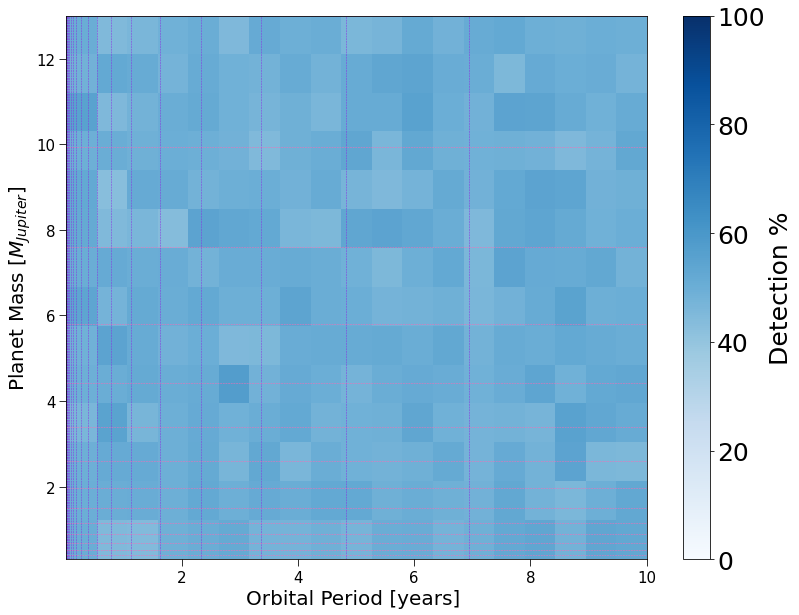

In [9]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

extent = Pbins[0], Pbins[-1], Mbins[0], Mbins[-1]

im = plt.imshow(sensitivity.T, 
                extent=extent, 
                aspect='auto', 
                cmap='Blues',
                vmin=0, 
                vmax=100,
                interpolation='none',
                origin="upper", )


cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Detection %', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)


# axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Plotting vertical lines
for p in Pbins:
    ax.axvline(x=p, color='blueviolet', linestyle='--', linewidth=0.5)

# Plotting horizontal lines
for m in Mbins:
    ax.axhline(y=m, color='hotpink', linestyle='--', linewidth=0.5)

# Set log scale for both axes
# ax.set_xscale('log')
# ax.set_yscale('log')

plt.show()